In [154]:
import pandas as pd

events_df = pd.read_parquet("./data/eventos_sem_generic.parquet")
events_df = events_df[events_df["pass_type"] == "CROSS"]
invalid_crosses = events_df[(events_df["end_coordinates_x"].isna()) & (events_df["end_coordinates_y"].isna())]

In [155]:
import pandas as pd

gamestates = pd.read_parquet("./gamestates.parquet")

# Pega apenas gamestates com tracking processado
gamestates = gamestates[gamestates['attackers_in_box'].notna()]


# gamestates = gamestates[~gamestates["event_id"].isin(invalid_crosses["event_id"].tolist())]
# gamestates = gamestates[
#     (gamestates['start_x'] >= 25) &
#     (gamestates['start_x'] < 105/2) &
#     (gamestates['start_y'] < 34) &
#     (gamestates['start_y'] >= 20) &

#     (gamestates['end_x'] >= 35) &
#     (gamestates['end_x'] < 105/2) &
#     (gamestates['end_y'] <= 10) &
#     (gamestates['end_y'] > -20)
# ]

In [156]:
gamestates.columns

Index(['match_id', 'event_id', 'team_id', 'action_2', 'start_x_2', 'start_y_2',
       'end_x_2', 'end_y_2', 'action_1', 'start_x_1', 'start_y_1', 'end_x_1',
       'end_y_1', 'action', 'start_x', 'start_y', 'end_x', 'end_y',
       'cross_success', 'attackers_in_box', 'defenders_in_box',
       'attackers_in_zone', 'defenders_in_zone', 'entropy_general',
       'entropy_diff', 'pitch_control_at_target',
       'num_attackers_near_action_line', 'num_defenders_near_action_line'],
      dtype='object')

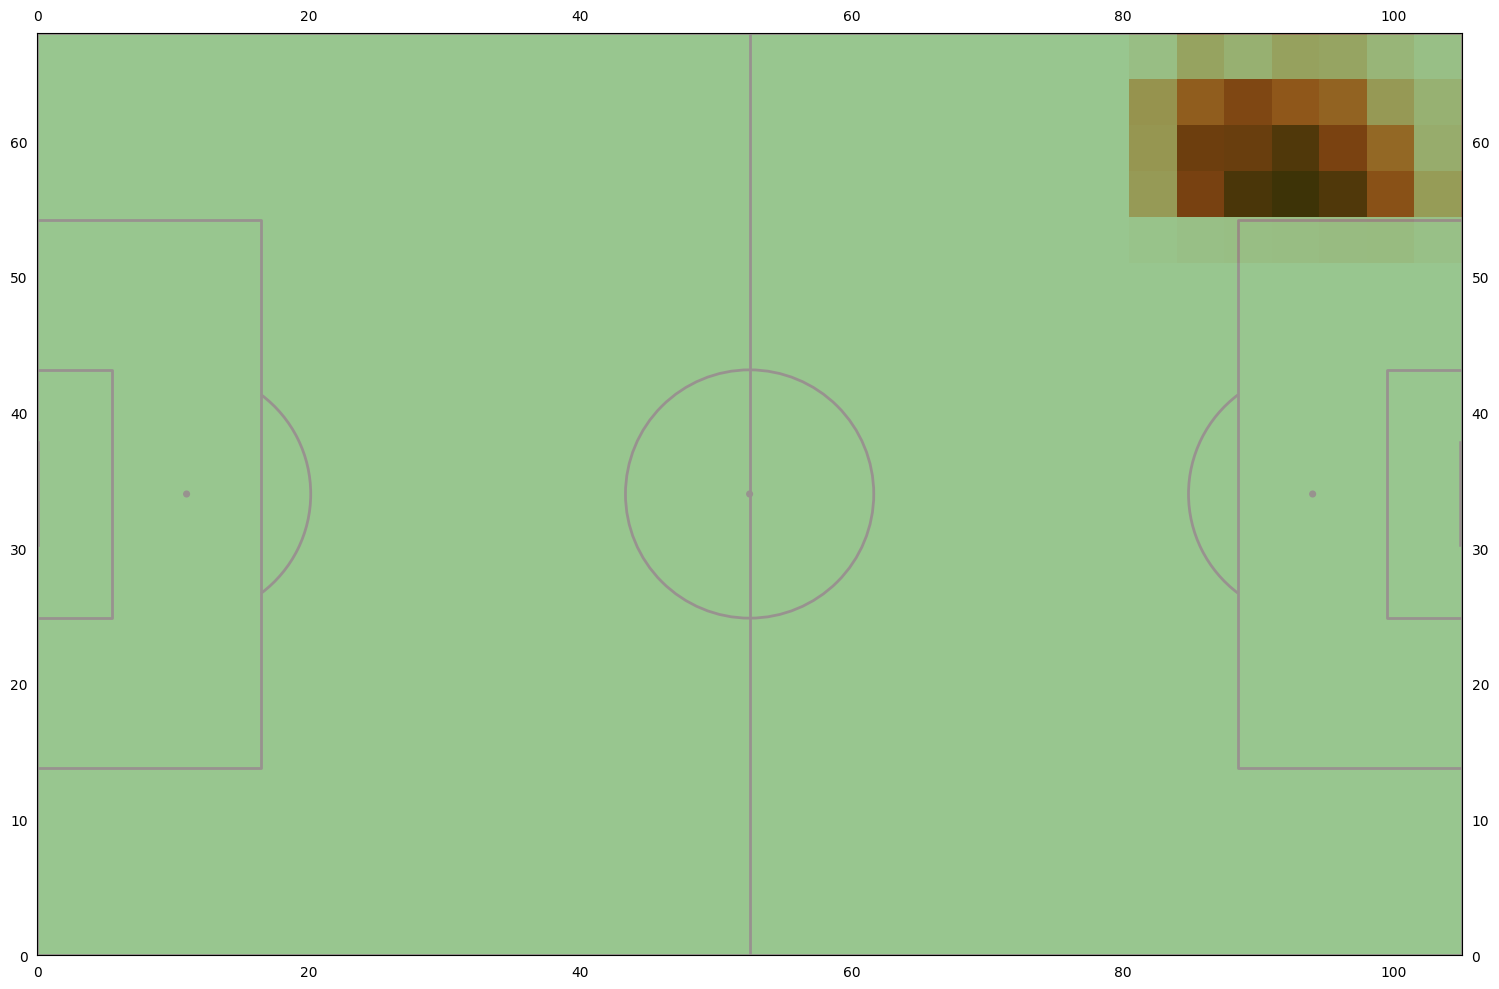

In [157]:
from mplsoccer import Pitch

pitch = Pitch(pitch_type='custom', pitch_length=105, pitch_width=68,
              line_color='black', pitch_color='green', half=False, 
              axis=True, label=True, pad_left=0, pad_right=0, pad_top=0, pad_bottom=0)


fig, ax = pitch.draw(figsize=(16,10))

bin_stat = pitch.bin_statistic(gamestates['start_x'] + 105/2, gamestates['start_y'] + 68/2, statistic='count', bins=(30, 20))

pitch.heatmap(
    bin_stat,
    ax=ax,
    cmap='Reds',         # Usa tons de vermelho, evitando fundo escuro
    edgecolors=None,  # Mostra os contornos dos bins
    alpha=0.6            # Transparência para preservar o campo
)


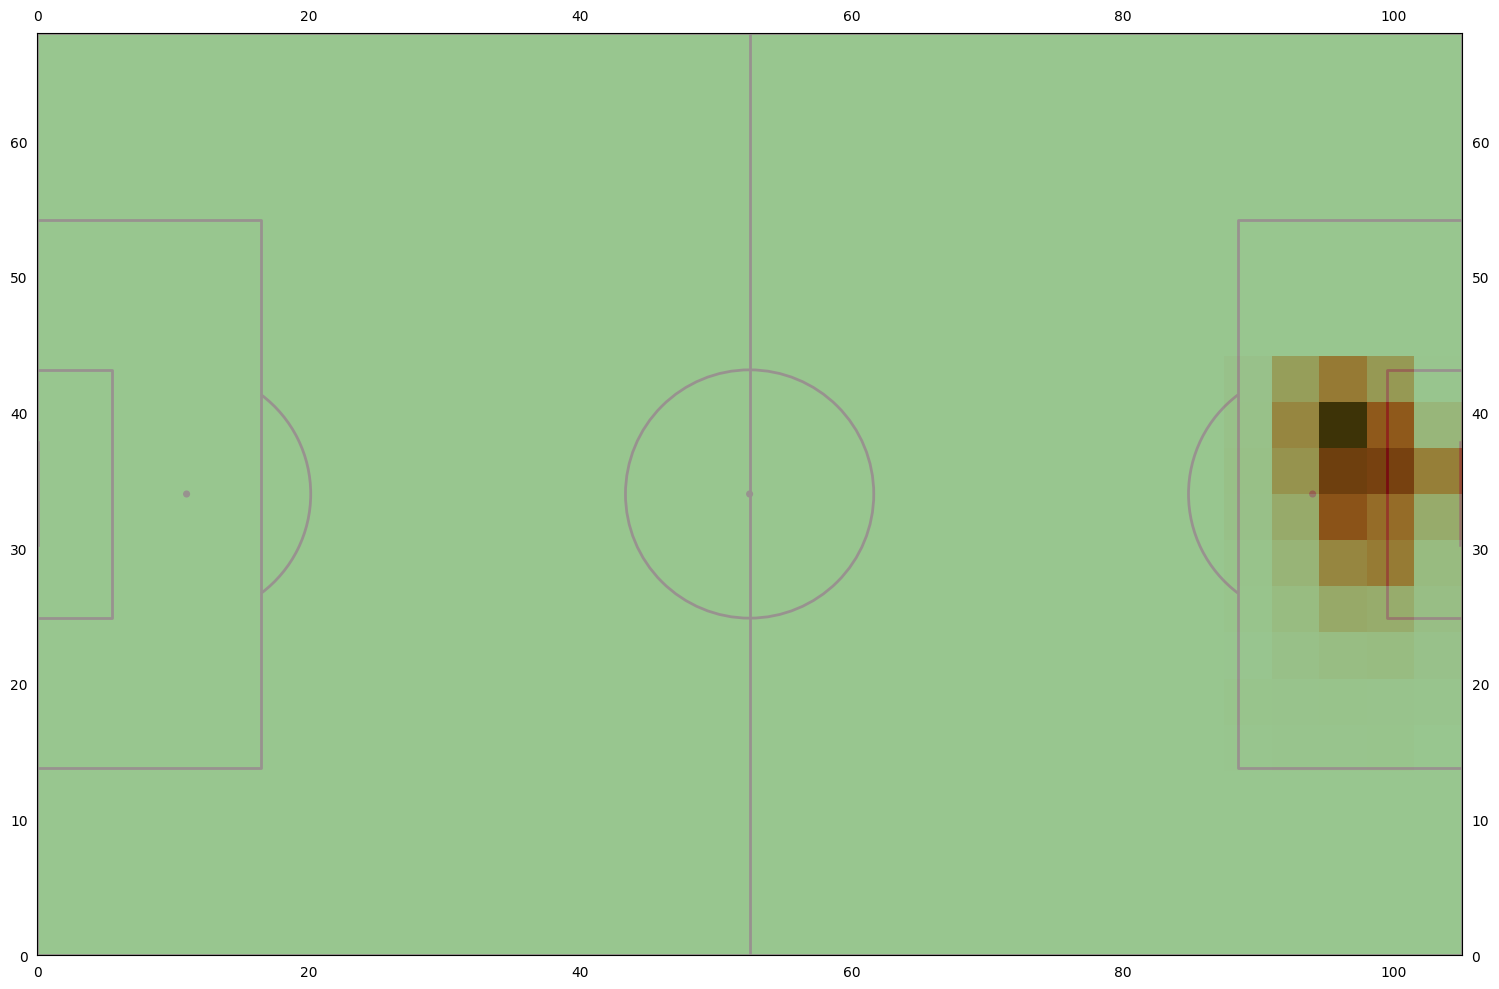

In [158]:
from mplsoccer import Pitch

pitch = Pitch(pitch_type='custom', pitch_length=105, pitch_width=68,
              line_color='black', pitch_color='green', half=False, 
              axis=True, label=True, pad_left=0, pad_right=0, pad_top=0, pad_bottom=0)


fig, ax = pitch.draw(figsize=(16,10))

bin_stat = pitch.bin_statistic(gamestates['end_x'] + 105/2, gamestates['end_y'] + 68/2, statistic='count', bins=(30, 20))

pitch.heatmap(
    bin_stat,
    ax=ax,
    cmap='Reds',         # Usa tons de vermelho, evitando fundo escuro
    edgecolors=None,  # Mostra os contornos dos bins
    alpha=0.6            # Transparência para preservar o campo
)


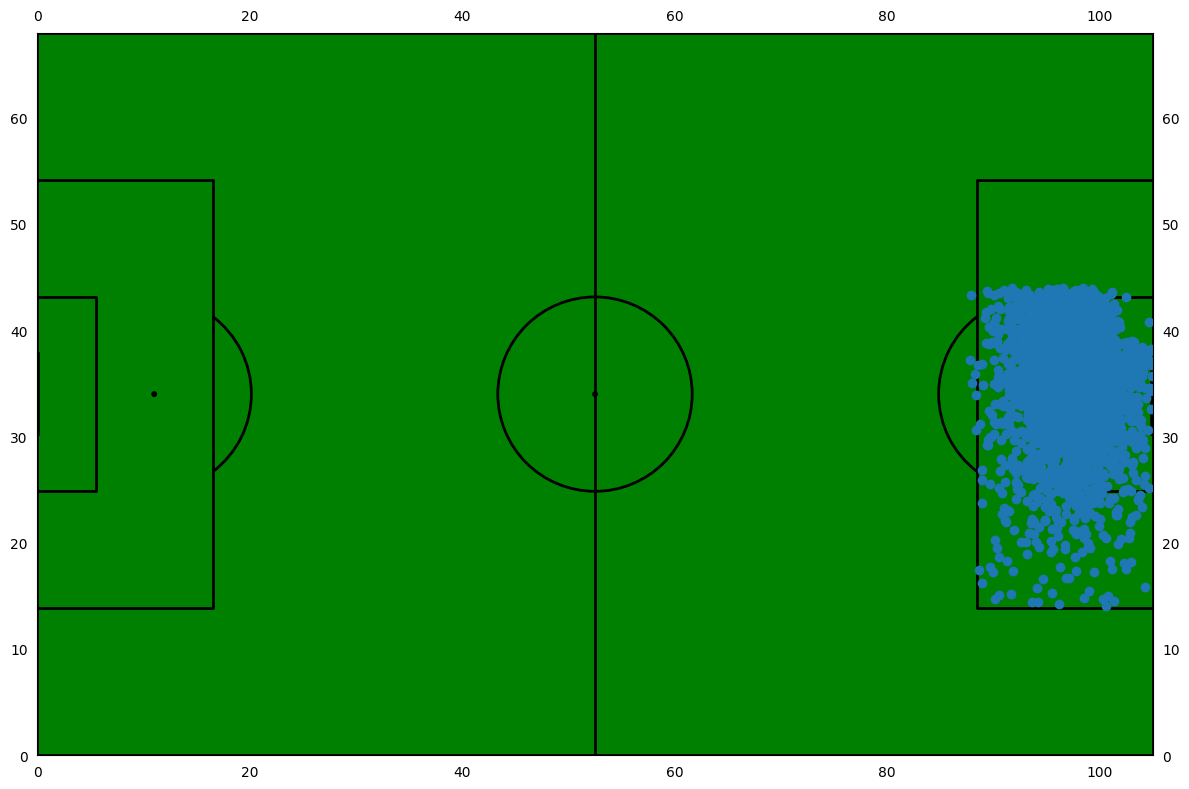

In [159]:
from mplsoccer import Pitch

pitch = Pitch(pitch_type='custom', pitch_length=105, pitch_width=68,
              line_color='black', pitch_color='green', half=False, 
              axis=True, label=True, pad_left=0, pad_right=0, pad_top=0, pad_bottom=0)


fig, ax = pitch.draw(figsize=(12,10))

ax.scatter(gamestates.end_x + 105/2, gamestates.end_y + 68/2)

In [160]:
gamestates

,match_id,event_id,team_id,action_2,start_x_2,start_y_2,end_x_2,end_y_2,action_1,start_x_1,...,cross_success,attackers_in_box,defenders_in_box,attackers_in_zone,defenders_in_zone,entropy_general,entropy_diff,pitch_control_at_target,num_attackers_near_action_line,num_defenders_near_action_line
0,13335,12926871,11,PASS,45.632,17.009,29.518,19.635,PASS,29.518,...,1,5.0,10.0,1.0,1.0,0.024080,-0.021505,-0.999866,1.0,5.0
1,13335,12927878,11,PASS,11.829,23.639,18.517,28.793,PASS,27.271,...,0,3.0,7.0,0.0,2.0,0.071664,-0.097317,-0.999536,1.0,1.0
2,13335,12927949,11,CLEARANCE,41.995,4.524,41.995,4.524,PASS,28.903,...,1,3.0,10.0,1.0,0.0,0.057446,0.026197,0.831304,1.0,3.0
13,13336,12928864,2,PASS,15.408,-1.277,26.596,12.278,PASS,26.772,...,1,4.0,8.0,1.0,2.0,0.068060,-0.023503,-0.067057,0.0,3.0
25,13337,12929059,19,PASS,27.726,27.998,23.205,23.209,PASS,23.205,...,0,3.0,5.0,0.0,1.0,0.014662,-0.019568,0.427195,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7587,13621,18793089,218,PASS,31.387,31.992,31.125,26.484,PASS,31.125,...,0,1.0,5.0,0.0,0.0,0.013112,-0.014697,0.566064,0.0,1.0
7589,13621,18795193,221,PASS,28.847,24.193,18.637,19.594,PASS,23.312,...,0,1.0,5.0,0.0,1.0,0.023103,-0.023017,0.991206,0.0,0.0
7591,13621,18796158,218,PASS,15.871,-5.877,6.858,-2.793,PASS,15.053,...,0,1.0,4.0,0.0,1.0,0.065351,-0.085311,-0.993465,1.0,1.0
7594,13621,18799230,221,TACKLE,45.695,1.098,45.695,1.098,CLEARANCE,45.695,...,0,5.0,9.0,0.0,1.0,0.048623,-0.042645,-0.878463,1.0,0.0


In [161]:

# from sklearn.cluster import KMeans

# # Pegamos as coordenadas finais do cruzamento
# coords = gamestates[['start_x', 'start_y']]

# # Definimos o número de regiões (ex: 4 clusters)
# kmeans = KMeans(n_clusters=2, random_state=42)
# gamestates['start_region'] = kmeans.fit_predict(coords)

# from utils.plot import plot_pitch


# fig, ax = plot_pitch()

# for region in gamestates["start_region"].unique().tolist():
#     cluster = gamestates[gamestates["start_region"] == region]
#     ax.scatter(cluster["start_x"], cluster["start_y"])

In [162]:
# import pandas as pd
# from sklearn.cluster import KMeans

# def cluster_by_end_coords(df: pd.DataFrame):
#     coords = gamestates[['end_x', 'end_y']]


# # Pegamos as coordenadas finais do cruzamento

# # Definimos o número de regiões (ex: 4 clusters)
# kmeans = KMeans(n_clusters=3, random_state=42)
# gamestates['cross_region'] = kmeans.fit_predict(coords)


In [163]:
# from utils.plot import plot_pitch


# fig, ax = plot_pitch()

# for region in gamestates["cross_region"].unique().tolist():
#     cluster = gamestates[gamestates["cross_region"] == region]
#     ax.scatter(cluster["end_x"], cluster["end_y"])

In [164]:
def classify_cross(end_x, end_y):
    # Limites da área lado direito
    if end_y > 3:
            return 'primeiro_pau'
    elif end_y < -3:
        return "segundo_pau"
    else:
         return "area"

gamestates['cross_region'] = gamestates.apply(
    lambda row: classify_cross(row['end_x'], row['end_y']),
    axis=1
)

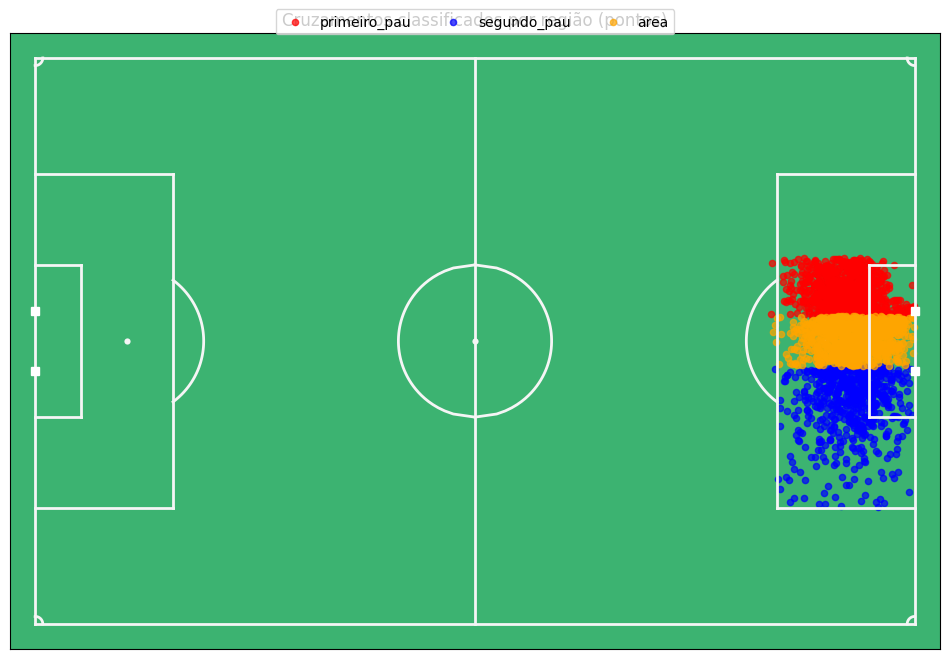

In [165]:
import matplotlib.pyplot as plt
# Define cores por região
from utils.plot import plot_pitch


colors = {
    'primeiro_pau': 'red',
    'segundo_pau': 'blue',
    'area': 'orange',
}

# Plot
fig, ax = plot_pitch((105, 68))

# Plotar pontos por região com legenda
for region, color in colors.items():
    pts = gamestates[gamestates['cross_region'] == region]
    ax.scatter(pts['end_x'], pts['end_y'], c=color, label=region, s=20, alpha=0.7)

# ax.scatter([36, 36], [5, -5])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)
plt.title('Cruzamentos classificados por região (pontos)')
plt.show()

In [166]:
import numpy as np

def compute_polar_angles(row):
    # Vetor: ação anterior → início do cruzamento
    dx1 = row['start_x'] - row['start_x_1']
    dy1 = row['start_y'] - row['start_y_1']
    angle1 = np.arctan2(dy1, dx1)  # Em radianos

    # Vetor: início do cruzamento → fim do cruzamento
    dx2 = row['end_x'] - row['start_x']
    dy2 = row['end_y'] - row['start_y']
    angle2 = np.arctan2(dy2, dx2)  # Em radianos

    return pd.Series({
        'polar_angle_entry': angle1,
        'polar_angle_cross': angle2
    })


def compute_signed_angle_from_y(action, degrees=False):
    """
    Retorna o ângulo assinado entre o vetor da ação e o eixo Y positivo.
    
    Ângulos:
    - Positivo: cruzamento/progressão para frente (em direção ao gol)
    - Negativo: cruzamento de recuo
    - 0: alinhado com o eixo Y (para cima ou para baixo)
    
    Args:
        action (dict): Contendo 'start_x', 'start_y', 'end_x', 'end_y'
        degrees (bool): Se True, retorna o valor em graus
    
    Returns:
        float: Ângulo assinado com relação ao eixo Y (em radianos ou graus)
    """
    dx = action['end_x'] - action['start_x']
    dy = action['end_y'] - action['start_y']
    
    # Ângulo da ação em relação ao eixo X
    angle = np.arctan2(dy, dx)
    
    # Ângulo assinado em relação ao eixo Y (pi/2 rad = 90 graus)
    angle_from_y = angle - np.pi / 2
    
    # Normaliza para o intervalo [-pi, pi]
    if angle_from_y > np.pi:
        angle_from_y -= 2 * np.pi
    elif angle_from_y < -np.pi:
        angle_from_y += 2 * np.pi

    if degrees:
        angle_from_y = np.degrees(angle_from_y)
    
    return angle_from_y

In [167]:
gamestates[['polar_angle_entry', 'polar_angle_cross']] = gamestates.apply(compute_polar_angles, axis=1)

In [168]:
gamestates['signed_angle_cross_from_y'] = gamestates.apply(compute_signed_angle_from_y, axis=1)

In [169]:
def distance_start_from_goal(action):
    return np.sqrt(((68/2) - action["start_x"]) ** 2 + (0 - action["start_y"])**2)

gamestates["distance_start_from_goal"] = gamestates.apply(distance_start_from_goal, axis=1)

def distance_from_end_line(action):
    return 105/2 - action["start_x"]

gamestates["distance_from_end_line"] = gamestates.apply(distance_from_end_line, axis=1)

gamestates

,match_id,event_id,team_id,action_2,start_x_2,start_y_2,end_x_2,end_y_2,action_1,start_x_1,...,entropy_diff,pitch_control_at_target,num_attackers_near_action_line,num_defenders_near_action_line,cross_region,polar_angle_entry,polar_angle_cross,signed_angle_cross_from_y,distance_start_from_goal,distance_from_end_line
0,13335,12926871,11,PASS,45.632,17.009,29.518,19.635,PASS,29.518,...,-0.021505,-0.999866,1.0,5.0,segundo_pau,0.506937,-1.495574,-3.066370,28.749465,9.295
1,13335,12927878,11,PASS,11.829,23.639,18.517,28.793,PASS,27.271,...,-0.097317,-0.999536,1.0,1.0,primeiro_pau,0.214887,-1.328371,-2.899167,26.237086,15.841
2,13335,12927949,11,CLEARANCE,41.995,4.524,41.995,4.524,PASS,28.903,...,0.026197,0.831304,1.0,3.0,segundo_pau,0.746028,-1.313192,-2.883988,21.809420,12.145
13,13336,12928864,2,PASS,15.408,-1.277,26.596,12.278,PASS,26.772,...,-0.023503,-0.067057,0.0,3.0,segundo_pau,0.314694,-1.344487,-2.915283,22.505923,11.495
25,13337,12929059,19,PASS,27.726,27.998,23.205,23.209,PASS,23.205,...,-0.019568,0.427195,1.0,1.0,area,-0.130916,-1.151870,-2.722666,21.601239,15.632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7587,13621,18793089,218,PASS,31.387,31.992,31.125,26.484,PASS,31.125,...,-0.014697,0.566064,0.0,1.0,segundo_pau,-0.063054,-1.597986,3.114403,27.755012,7.849
7589,13621,18795193,221,PASS,28.847,24.193,18.637,19.594,PASS,23.312,...,-0.023017,0.991206,0.0,0.0,area,0.446596,-1.146227,-2.717023,25.915358,16.934
7591,13621,18796158,218,PASS,15.871,-5.877,6.858,-2.793,PASS,15.053,...,-0.085311,-0.993465,1.0,1.0,primeiro_pau,0.967102,-1.079005,-2.649801,29.087092,22.175
7594,13621,18799230,221,TACKLE,45.695,1.098,45.695,1.098,CLEARANCE,45.695,...,-0.042645,-0.878463,1.0,0.0,area,1.819458,-1.656801,3.055588,29.963289,14.050


In [170]:
epsilon = 1e-6
gamestates["box_ratio"] = gamestates["attackers_in_box"] / (gamestates["defenders_in_box"] + epsilon)

gamestates["zone_ratio"] = gamestates["attackers_in_zone"] / (gamestates["defenders_in_zone"] + epsilon)


In [173]:
gamestates.drop(columns=["action", "action_2", "start_x_2", "start_y_2", "end_y_2", "end_x_2",]).to_parquet("gamestates_final.parquet")

In [ ]:
X = gamestates.rename({}).drop(columns=[
    "cross_success", "match_id", "event_id", "team_id", "action",
    "action_2", "start_x_2", "start_y_2", "end_y_2", "end_x_2",
    # "start_x_1", "start_y_1", "end_y_1", "end_x_1",
    # "start_x", "start_y",
    # "end_y", "end_x",
    # "attackers_in_box",	"defenders_in_box",
    # "attackers_in_zone", "defenders_in_zone",
])
X.head()

,action_1,start_x_1,start_y_1,end_x_1,end_y_1,start_x,start_y,end_x,end_y,attackers_in_box,...,num_attackers_near_action_line,num_defenders_near_action_line,polar_angle_entry,polar_angle_cross,distance_start_from_goal,distance_from_end_line,signe_angle_from_y_cross,box_ratio,zone_ratio,cross_region
0,PASS,29.518,19.635,43.205,27.236,43.205,27.236,46.140,-11.708,5.0,...,1.0,5.0,0.506937,-1.495574,28.749465,9.295,-3.066370,0.500000,0.999999,segundo_pau
1,PASS,27.271,24.053,34.653,28.309,36.659,26.102,41.995,4.524,3.0,...,1.0,1.0,0.214887,-1.328371,26.237086,15.841,-2.899167,0.428571,0.000000,primeiro_pau
2,PASS,28.903,10.279,34.911,22.386,40.355,20.863,47.882,-7.707,3.0,...,1.0,3.0,0.746028,-1.313192,21.809420,12.145,-2.883988,0.300000,1000000.000000,segundo_pau
13,PASS,26.772,16.755,37.811,24.854,41.005,21.388,47.707,-7.719,4.0,...,0.0,3.0,0.314694,-1.344487,22.505923,11.495,-2.915283,0.500000,0.500000,segundo_pau
25,PASS,23.205,23.209,35.884,22.942,36.868,21.410,45.218,2.658,3.0,...,1.0,1.0,-0.130916,-1.151870,21.601239,15.632,-2.722666,0.600000,0.000000,area


In [135]:
X = pd.get_dummies(X, columns=[
    'action_1',
    # 'start_region',
    'cross_region',
    # 'action_2'
])

In [136]:
X

,start_x_1,start_y_1,end_x_1,end_y_1,start_x,start_y,end_x,end_y,attackers_in_box,defenders_in_box,...,action_1_PASS,action_1_SHORT_CORNER,action_1_SHORT_FREEKICK,action_1_SHOT,action_1_TACKLE,action_1_TAKE_ON,action_1_THROW_IN,cross_region_area,cross_region_primeiro_pau,cross_region_segundo_pau
0,29.518,19.635,43.205,27.236,43.205,27.236,46.140,-11.708,5.0,10.0,...,True,False,False,False,False,False,False,False,False,True
1,27.271,24.053,34.653,28.309,36.659,26.102,41.995,4.524,3.0,7.0,...,True,False,False,False,False,False,False,False,True,False
2,28.903,10.279,34.911,22.386,40.355,20.863,47.882,-7.707,3.0,10.0,...,True,False,False,False,False,False,False,False,False,True
13,26.772,16.755,37.811,24.854,41.005,21.388,47.707,-7.719,4.0,8.0,...,True,False,False,False,False,False,False,False,False,True
25,23.205,23.209,35.884,22.942,36.868,21.410,45.218,2.658,3.0,5.0,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7587,31.125,26.484,44.651,25.630,44.651,25.630,43.835,-4.374,1.0,5.0,...,True,False,False,False,False,False,False,False,False,True
7589,23.312,20.000,35.812,25.722,35.566,25.868,46.633,1.387,1.0,5.0,...,True,False,False,False,False,False,False,True,False,False
7591,15.053,6.707,27.844,27.153,30.325,28.854,40.546,9.774,1.0,4.0,...,True,False,False,False,False,False,False,False,True,False
7594,45.695,1.098,45.695,1.098,38.450,29.631,35.889,-0.073,5.0,9.0,...,False,False,False,False,False,False,False,True,False,False


In [137]:
Y = gamestates["cross_success"]

In [138]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Suponha que df seja seu DataFrame com features numéricas
# correlation_matrix = X.corr(method='pearson')  # Também pode ser 'spearman' ou 'kendall'

# plt.figure(figsize=(16, 10))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
# plt.title("Matriz de Correlação entre as Features")
# plt.show()


In [139]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

In [140]:
scale_pos_weight = len(Y_train[Y_train == 0]) / len(Y_train[Y_train == 1])

In [150]:
import xgboost as xgb

model = xgb.XGBClassifier(
    n_estimators=500,     # Número de árvores
    learning_rate=0.1,    # Taxa de aprendizado
    max_depth=8,     # Profundidade máxima das árvores
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',  # Para evitar warnings no XGBoost atual
    scale_pos_weight=scale_pos_weight
)

model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [151]:
Y_pred = model.predict(X_test)

Acurácia: 0.73
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       368
           1       0.48      0.37      0.42       128

    accuracy                           0.73       496
   macro avg       0.64      0.61      0.62       496
weighted avg       0.71      0.73      0.72       496

Axes(0.125,0.11;0.775x0.77)


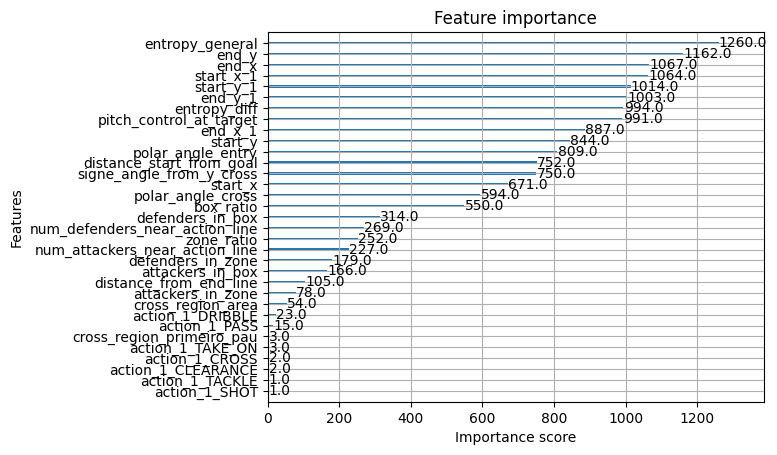

In [152]:
from sklearn.metrics import accuracy_score, classification_report
from xgboost import plot_importance


accuracy = accuracy_score(Y_test, Y_pred)
print(f"Acurácia: {accuracy:.2f}")

classification = classification_report(Y_test, Y_pred)
print(classification)

print(plot_importance(model))

In [149]:
importances = model.feature_importances_

# Cria DataFrame com nomes das features
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

importance_df

,feature,importance
10,attackers_in_zone,0.065632
9,defenders_in_box,0.052928
7,end_y,0.050973
13,entropy_diff,0.045544
23,zone_ratio,0.042646
37,cross_region_area,0.040434
30,action_1_PASS,0.039101
6,end_x,0.038551
8,attackers_in_box,0.038069
35,action_1_TAKE_ON,0.034993


In [193]:
result = pd.DataFrame({
    "target": Y_test,
    "pred": Y_pred 
})

# --- Identificando os tipos de predição ---
# Verdadeiros Positivos (VP): target=1 e pred=1
vp = result[(result["target"] == 1) & (result["pred"] == 1)]
num_vp = len(vp)

# Falsos Positivos (FP): target=0 e pred=1
fp = result[(result["target"] == 0) & (result["pred"] == 1)]
num_fp = len(fp)

# Falsos Negativos (FN): target=1 e pred=0
fn = result[(result["target"] == 1) & (result["pred"] == 0)]
num_fn = len(fn)

# Verdadeiros Negativos (VN): target=0 e pred=0
vn = result[(result["target"] == 0) & (result["pred"] == 0)]
num_vn = len(vn)

print("--- Contagens de Tipos de Predição ---")
print(f"Verdadeiros Positivos (VP): {num_vp}")
print(f"Falsos Positivos (FP): {num_fp}")
print(f"Falsos Negativos (FN): {num_fn}")
print(f"Verdadeiros Negativos (VN): {num_vn}")

# --- Calculando as Métricas para a Classe 1 (Sucesso) ---

# Recall da Classe 1
# Evitar divisão por zero caso não haja VPs nem FNs
if (num_vp + num_fn) > 0:
    recall_classe_1 = num_vp / (num_vp + num_fn)
else:
    recall_classe_1 = 0.0 # Ou NaN, dependendo do que você preferir

# Precisão da Classe 1
# Evitar divisão por zero caso não haja VPs nem FPs
if (num_vp + num_fp) > 0:
    precisao_classe_1 = num_vp / (num_vp + num_fp)
else:
    precisao_classe_1 = 0.0 # Ou NaN

print("\n--- Métricas Calculadas Manualmente (Classe 1) ---")
print(f"Recall da Classe 1: {recall_classe_1:.4f}")
print(f"Precisão da Classe 1: {precisao_classe_1:.4f}")

# --- Seu trecho original para ver Falsos Negativos ---
print("\n--- Detalhe dos Falsos Negativos (Target=1, Pred=0) ---")
print(fn)


--- Contagens de Tipos de Predição ---
Verdadeiros Positivos (VP): 38
Falsos Positivos (FP): 20
Falsos Negativos (FN): 90
Verdadeiros Negativos (VN): 348

--- Métricas Calculadas Manualmente (Classe 1) ---
Recall da Classe 1: 0.2969
Precisão da Classe 1: 0.6552

--- Detalhe dos Falsos Negativos (Target=1, Pred=0) ---
      target  pred
3125       1     0
4288       1     0
6863       1     0
1910       1     0
3311       1     0
...      ...   ...
4299       1     0
676        1     0
6834       1     0
5577       1     0
7344       1     0

[90 rows x 2 columns]


In [194]:
fn = result[(result["target"] == 1) & (result["pred"] == 0)]
fn

,target,pred
3125,1,0
4288,1,0
6863,1,0
1910,1,0
3311,1,0
...,...,...
4299,1,0
676,1,0
6834,1,0
5577,1,0


In [163]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')
pd.reset_option('display.width')

In [195]:
indices_falsos_negativos = fn.index

print(f"--- Foram encontrados {len(indices_falsos_negativos)} Falsos Negativos ---")
print(f"Índices dos Falsos Negativos: {list(indices_falsos_negativos)}")

# --- Passo 2: Filtrar o DataFrame X original usando esses índices ---
# Use .loc para garantir que você está pegando as linhas corretas pelo índice
X_falsos_negativos = gamestates.loc[indices_falsos_negativos]

print("\n--- Colunas de X para os Casos de Falso Negativo ---")
print("Analisar os valores dessas colunas pode revelar padrões nos erros do modelo:")
X_falsos_negativos.drop(columns=["action_2", "start_x_2", "start_y_2", "end_x_2", "end_y_2"]).describe()

--- Foram encontrados 90 Falsos Negativos ---
Índices dos Falsos Negativos: [3125, 4288, 6863, 1910, 3311, 4217, 4295, 1632, 2352, 3808, 6594, 646, 6423, 145, 1839, 2851, 1919, 1733, 941, 4106, 3437, 5550, 4837, 5510, 3504, 6412, 580, 3848, 971, 1009, 3935, 5186, 4408, 5275, 5854, 775, 1810, 726, 673, 5174, 6547, 7044, 5343, 3380, 4042, 6433, 6483, 2069, 3098, 94, 3557, 1598, 642, 4690, 4491, 6392, 6563, 1819, 837, 7188, 1185, 6223, 4317, 3749, 1331, 6245, 4162, 5839, 1949, 1576, 6814, 1104, 1929, 6570, 1876, 728, 241, 4700, 1433, 4023, 871, 3132, 6714, 5649, 895, 4299, 676, 6834, 5577, 7344]

--- Colunas de X para os Casos de Falso Negativo ---
Analisar os valores dessas colunas pode revelar padrões nos erros do modelo:


,match_id,event_id,team_id,start_x_1,start_y_1,end_x_1,end_y_1,start_x,start_y,end_x,end_y,cross_success,attackers_in_box,defenders_in_box,attackers_in_zone,defenders_in_zone,entropy_general,entropy_diff,polar_angle_entry,polar_angle_cross
count,90.0,90.0,90.0,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.0,90.000000,90.000000,90.000000,90.000000,8.400000e+01,90.000000,90.000000,90.000000
mean,13472.611111,16457027.522222,38.588889,26.169067,16.701456,34.524056,24.547644,38.066444,25.183433,43.604633,0.523111,1.0,2.244444,5.422222,0.633333,1.033333,6.387318e-02,-0.014636,0.401287,-1.349901
std,82.886506,3377913.247563,63.633235,16.052588,10.921805,10.709277,6.599205,5.525587,3.059081,3.047185,5.913500,0.0,1.769346,2.952728,0.879862,1.165516,4.747160e-02,0.030161,1.223475,0.217640
min,13339.0,12937881.0,1.0,-14.997000,-14.729000,-8.213000,-4.698000,30.456000,20.038000,36.903000,-17.434000,1.0,0.000000,0.000000,0.000000,0.000000,3.321928e-09,-0.084413,-3.049882,-1.915022
25%,13398.25,14845837.0,6.0,16.702750,11.357250,29.942000,22.681000,33.828250,23.117000,41.363250,-3.855500,1.0,1.000000,4.000000,0.000000,0.000000,1.624240e-02,-0.036440,0.069782,-1.504788
50%,13481.0,16000639.0,12.5,27.703500,18.657000,34.598000,26.154000,37.230000,25.079500,43.672500,1.392000,1.0,2.000000,5.500000,0.000000,1.000000,6.816624e-02,-0.010054,0.482166,-1.371231
75%,13545.75,17214422.75,20.0,39.435500,24.711250,40.466750,28.501250,41.495500,27.385000,45.816750,5.376000,1.0,3.000000,8.000000,1.000000,2.000000,9.996680e-02,0.000000,0.962364,-1.190156
max,13611.0,33202944.0,221.0,51.352000,34.236000,52.586000,32.304000,51.990000,31.885000,50.324000,9.433000,1.0,6.000000,11.000000,4.000000,4.000000,1.749136e-01,0.070996,2.919946,-0.872811


In [196]:

indices_verdadeiros_positvos = vp.index

print(f"--- Foram encontrados {len(indices_verdadeiros_positvos)} Falsos Negativos ---")
print(f"Índices dos Falsos Negativos: {list(indices_verdadeiros_positvos)}")

# --- Passo 2: Filtrar o DataFrame X original usando esses índices ---
# Use .loc para garantir que você está pegando as linhas corretas pelo índice
X_verdadeiros_positivos = gamestates.loc[indices_verdadeiros_positvos]

print("\n--- Colunas de X para os Casos de Falso Negativo ---")
print("Analisar os valores dessas colunas pode revelar padrões nos erros do modelo:")
X_verdadeiros_positivos.drop(columns=["action_2", "start_x_2", "start_y_2", "end_x_2", "end_y_2"]).describe()

--- Foram encontrados 38 Falsos Negativos ---
Índices dos Falsos Negativos: [6322, 4024, 1452, 2589, 4141, 3784, 4116, 6016, 601, 3490, 3150, 3915, 6942, 844, 3474, 6933, 1082, 4300, 1837, 4208, 3657, 5868, 3466, 1122, 6823, 517, 1451, 2515, 7230, 2297, 3682, 6390, 5068, 2724, 6909, 4344, 3668, 2251]

--- Colunas de X para os Casos de Falso Negativo ---
Analisar os valores dessas colunas pode revelar padrões nos erros do modelo:


,match_id,event_id,team_id,start_x_1,start_y_1,end_x_1,end_y_1,start_x,start_y,end_x,end_y,cross_success,attackers_in_box,defenders_in_box,attackers_in_zone,defenders_in_zone,entropy_general,entropy_diff,polar_angle_entry,polar_angle_cross
count,38.0,38.0,38.0,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0,38.000000,38.000000,38.000000,38.000000,3.700000e+01,38.000000,38.000000,38.000000
mean,13479.763158,16471695.236842,45.5,29.195421,16.872316,37.035421,26.302395,39.582579,24.506263,43.708921,-7.705579,1.0,3.789474,7.131579,0.763158,0.894737,4.705343e-02,0.017472,0.403827,-1.454021
std,74.175626,3366587.075056,73.80535,11.921506,10.466912,6.302470,3.356447,5.187022,3.186646,3.386703,5.248074,0.0,1.818195,2.326940,0.913390,1.290076,4.411569e-02,0.027923,1.284937,0.208768
min,13355.0,13454793.0,1.0,4.049000,-15.276000,25.693000,20.023000,30.989000,20.023000,37.090000,-18.720000,1.0,0.000000,0.000000,0.000000,0.000000,9.419490e-07,-0.070150,-3.076725,-1.822830
25%,13427.25,15287740.5,4.25,21.073500,9.314250,32.236250,24.319750,35.270500,21.735250,41.367500,-11.550500,1.0,3.000000,6.000000,0.000000,0.000000,5.070709e-03,0.000011,0.083305,-1.604770
50%,13477.0,15954251.0,11.0,29.173000,17.910000,37.055500,26.255000,39.337500,23.916500,43.493500,-8.072500,1.0,4.000000,7.000000,1.000000,0.000000,3.312616e-02,0.010615,0.513126,-1.458192
75%,13522.5,16978007.25,45.5,36.022750,24.554750,42.543250,28.706500,43.881250,27.135000,46.926250,-4.687000,1.0,5.000000,9.000000,1.000000,1.000000,8.248503e-02,0.035564,0.961611,-1.293408
max,13607.0,34957746.0,221.0,52.383000,32.408000,48.279000,33.192000,50.299000,33.192000,50.514000,6.287000,1.0,7.000000,11.000000,4.000000,5.000000,1.284823e-01,0.093825,3.138062,-1.118668


Análise Comparativa Detalhada: X_falsos_negativos vs. X_verdadeiros_positivos

Vou comparar as estatísticas descritivas das features mais relevantes entre os FNs e os VPs. É crucial entender que um "padrão" é uma diferença notável ou uma concentração de valores em uma faixa específica para os FNs em comparação com os VPs.

1. Features de Posição dos Jogadores (Densidade)

    attackers_in_box (Atacantes na Área)

        FNs: Média = 2.35, Mediana (50%) = 2.0, Min = 0.0, Max = 8.0

        VPs: Média = 2.36, Mediana = 2.0, Min = 0.0, Max = 9.0

        Análise: As estatísticas são extremamente semelhantes. Não há uma diferença notável na média ou distribuição de atacantes na área entre os cruzamentos que o modelo errou e os que acertou. O máximo nos VPs é ligeiramente maior, mas a distribuição geral é a mesma.

    defenders_in_box (Defensores na Área)

        FNs: Média = 5.40, Mediana = 5.0, Min = 0.0, Max = 11.0

        VPs: Média = 5.32, Mediana = 5.0, Min = 0.0, Max = 10.0

        Análise: Novamente, as estatísticas são muito próximas. A densidade de defensores na área não parece ser um fator distintivo claro para o modelo falhar. Ambos os grupos têm uma faixa similar de defensores, e o modelo parece lidar com essa feature de forma consistente para ambos.

    attackers_in_zone (Atacantes na Zona Ampla)

        FNs: Média = 0.56, Mediana = 0.0, Min = 0.0, Max = 4.0

        VPs: Média = 0.42, Mediana = 0.0, Min = 0.0, Max = 3.0

        Análise: Há uma pequena diferença aqui. A média de atacantes na zona é ligeiramente maior nos FNs (0.56) do que nos VPs (0.42). Ambos têm 0.0 como mediana, indicando que muitos casos têm nenhum atacante nessa zona. No entanto, o 75% dos FNs é 1.0, enquanto o dos VPs é 1.0, mas os VPs têm um Max de 3.0 contra 4.0 nos FNs. Isso pode sugerir que o modelo tem um pouco mais de dificuldade com cruzamentos que têm uma presença maior de atacantes na zona mais ampla, ou com a variabilidade nesses cenários.

    defenders_in_zone (Defensores na Zona Ampla)

        FNs: Média = 1.14, Mediana = 1.0, Min = 0.0, Max = 6.0

        VPs: Média = 0.36, Mediana = 0.0, Min = 0.0, Max = 4.0

        Análise: Esta é uma diferença significativa e um padrão forte! A média de defensores na zona é quase 3 vezes maior nos FNs (1.14) do que nos VPs (0.36). A mediana também é diferente (1.0 para FNs vs 0.0 para VPs). Isso indica que os Falsos Negativos (cruzamentos de sucesso que o modelo errou) tendem a ocorrer em situações onde há mais defensores na zona de influência mais ampla. O modelo pode estar subestimando a probabilidade de sucesso de um cruzamento quando a pressão defensiva fora da área é maior, mesmo que o cruzamento tenha sido bem-sucedido.

2. Features de Ângulo

    polar_angle_entry (Ângulo Polar de Entrada)

        FNs: Média = 0.46, Mediana = 0.55, Min = -3.10, Max = 3.08

        VPs: Média = 0.38, Mediana = 0.34, Min = -2.51, Max = 2.18

        Análise: As médias e medianas dos FNs são ligeiramente maiores que as dos VPs. O range dos FNs também é um pouco mais amplo. Isso pode indicar que o modelo tem mais dificuldade com cruzamentos que possuem ângulos de entrada ligeiramente mais "abertos" (maiores valores positivos ou menores valores negativos) ou que são mais variados, resultando em FNs.

    polar_angle_cross (Ângulo Polar do Cruzamento)

        FNs: Média = -1.36, Mediana = -1.33, Min = -1.95, Max = -0.74

        VPs: Média = -1.41, Mediana = -1.38, Min = -1.89, Max = -0.98

        Análise: A média dos FNs é ligeiramente menos negativa (mais próxima de zero) do que a dos VPs, e o range dos FNs é um pouco mais amplo no lado positivo. Isso sugere que os FNs podem ter ângulos de cruzamento que são um pouco mais "abertos" ou "perpendiculares" ao gol em comparação com os VPs, os quais tendem a ter ângulos mais consistentes ou "fechados". O modelo pode não estar capturando a dinâmica de sucesso em cruzamentos com esses ângulos específicos.

3. Features de Coordenadas (Posição)

    start_x_1, start_y_1 (Posição de Início do Cruzador)

        FNs (start_x_1): Média = 23.81, Mediana = 24.19, Min = -43.45 (muito recuado).

        VPs (start_x_1): Média = 23.71, Mediana = 26.77, Min = -15.13 (menos recuado).

        FNs (start_y_1): Média = 16.20, Mediana = 17.37.

        VPs (start_y_1): Média = 18.03, Mediana = 18.47.

        Análise: As médias de start_x_1 são similares, mas o min dos FNs é consideravelmente menor (-43.45 vs -15.13). Isso indica que os FNs incluem cruzamentos que começaram de posições extremamente recuadas no campo, o que não é tão comum nos VPs. Para start_y_1, os FNs têm uma média e mediana ligeiramente menores (mais próximas do centro do campo ou de um lado, dependendo da convenção do eixo Y). Isso pode sugerir que o modelo tem dificuldade com cruzamentos que se originam de posições mais centrais ou de linhas laterais mais recuadas.

    end_x, end_y (Posição Final da Bola)

        FNs (end_x): Média = 44.11, Mediana = 44.52, Max = 50.80 (próximo à linha de fundo).

        VPs (end_x): Média = 44.03, Mediana = 43.75, Max = 52.23.

        FNs (end_y): Média = -1.01, Mediana = -0.80.

        VPs (end_y): Média = -12.35, Mediana = -10.62.

        Análise: Para end_x, as posições finais são muito parecidas, ambas bem avançadas no campo, o que é esperado para cruzamentos. A diferença crucial aqui está em end_y: A média e mediana de end_y nos FNs são muito mais próximas de zero (mais centralizadas) do que nos VPs (média -1.01 para FNs vs -12.35 para VPs). Isso é um padrão fortíssimo de Falso Negativo: o modelo falha em identificar sucesso quando a bola termina mais perto do centro do campo na largura (end_y mais próximo de zero), enquanto ele acerta mais quando a bola termina mais nas laterais do campo (end_y mais negativo/distante de zero). O modelo pode estar associando posições finais mais centrais a situações de maior contestação ou menos "espaço livre", prevendo insucesso mesmo que a posse tenha sido mantida.

Padrões Chaves Identificados para o Baixo Recall

    Alta Densidade Defensiva na Zona Ampla (defenders_in_zone):

        Padrão: Os Falsos Negativos ocorrem em situações com mais defensores na zona de influência mais ampla do que os Verdadeiros Positivos (média 1.14 para FNs vs 0.36 para VPs).

        Implicação: O modelo pode estar superestimando o impacto negativo de defensores fora da área, prevendo insucesso mesmo quando o cruzamento é efetivo em cenários de maior "tráfego" defensivo.

    Posição Final da Bola Mais Centralizada na Largura (end_y):

        Padrão: Os Falsos Negativos tendem a ter a bola terminando em posições Y mais próximas do centro do campo (mais centralizadas) em comparação com os Verdadeiros Positivos (média -1.01 para FNs vs -12.35 para VPs).

        Implicação: O modelo parece ter dificuldade em reconhecer sucesso quando a bola do cruzamento termina em uma área mais central, possivelmente associando-a a maior risco de interceptação, mesmo que a posse tenha sido mantida. Os VPs, por outro lado, terminam a bola mais consistentemente nas laterais.

    Ângulos de Cruzamento Ligeiramente Mais "Abertos" (polar_angle_cross) e Maior Variabilidade no Ângulo de Entrada (polar_angle_entry):

        Padrão: Os FNs mostram uma tendência a ângulos de cruzamento que são um pouco mais "abertos" (menos negativos) e uma maior variabilidade nos ângulos de entrada.

        Implicação: O modelo pode não estar generalizando bem para variações mais amplas ou ângulos específicos de cruzamento que, embora resultem em sucesso, não são os mais "típicos" ou ideais que ele aprendeu.

    Cruzamentos Originados de Posições Extremamente Recuadas (start_x_1):

        Padrão: Os FNs incluem casos onde o cruzamento começa de posições X muito recuadas (mínimo de -43.45).

        Implicação: O modelo pode ter dificuldade em prever sucesso para cruzamentos que vêm de profundidade extrema no campo.

Recomendações para Melhorar o Recall:

Com base nesses insights, sugiro as seguintes ações:

    Engenharia de Features Focada:

        Interações: Crie features de interação que combinem defenders_in_zone com end_y. Por exemplo, uma feature que indique "densidade defensiva alta E bola centralizada".

        Binning para defenders_in_zone e end_y: Transforme essas variáveis em categorias (ex: defenders_in_zone_binned = 'baixo', 'médio', 'alto') e para end_y ('central', 'lateral_esquerda', 'lateral_direita' - se o eixo Y tiver sentido de lado do campo).

        Novas Features de Ângulo: Experimente criar features que destaquem cruzamentos com ângulos polar_angle_cross mais "abertos" ou que capturem a variabilidade em polar_angle_entry.

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)

In [29]:

from sklearn.metrics import accuracy_score, classification_report


accuracy = accuracy_score(Y_test, Y_pred)
print(f"Acurácia: {accuracy:.2f}")

classification = classification_report(Y_test, Y_pred)
print(classification)

Acurácia: 0.76
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       368
           1       0.60      0.23      0.34       128

    accuracy                           0.76       496
   macro avg       0.69      0.59      0.60       496
weighted avg       0.73      0.76      0.72       496



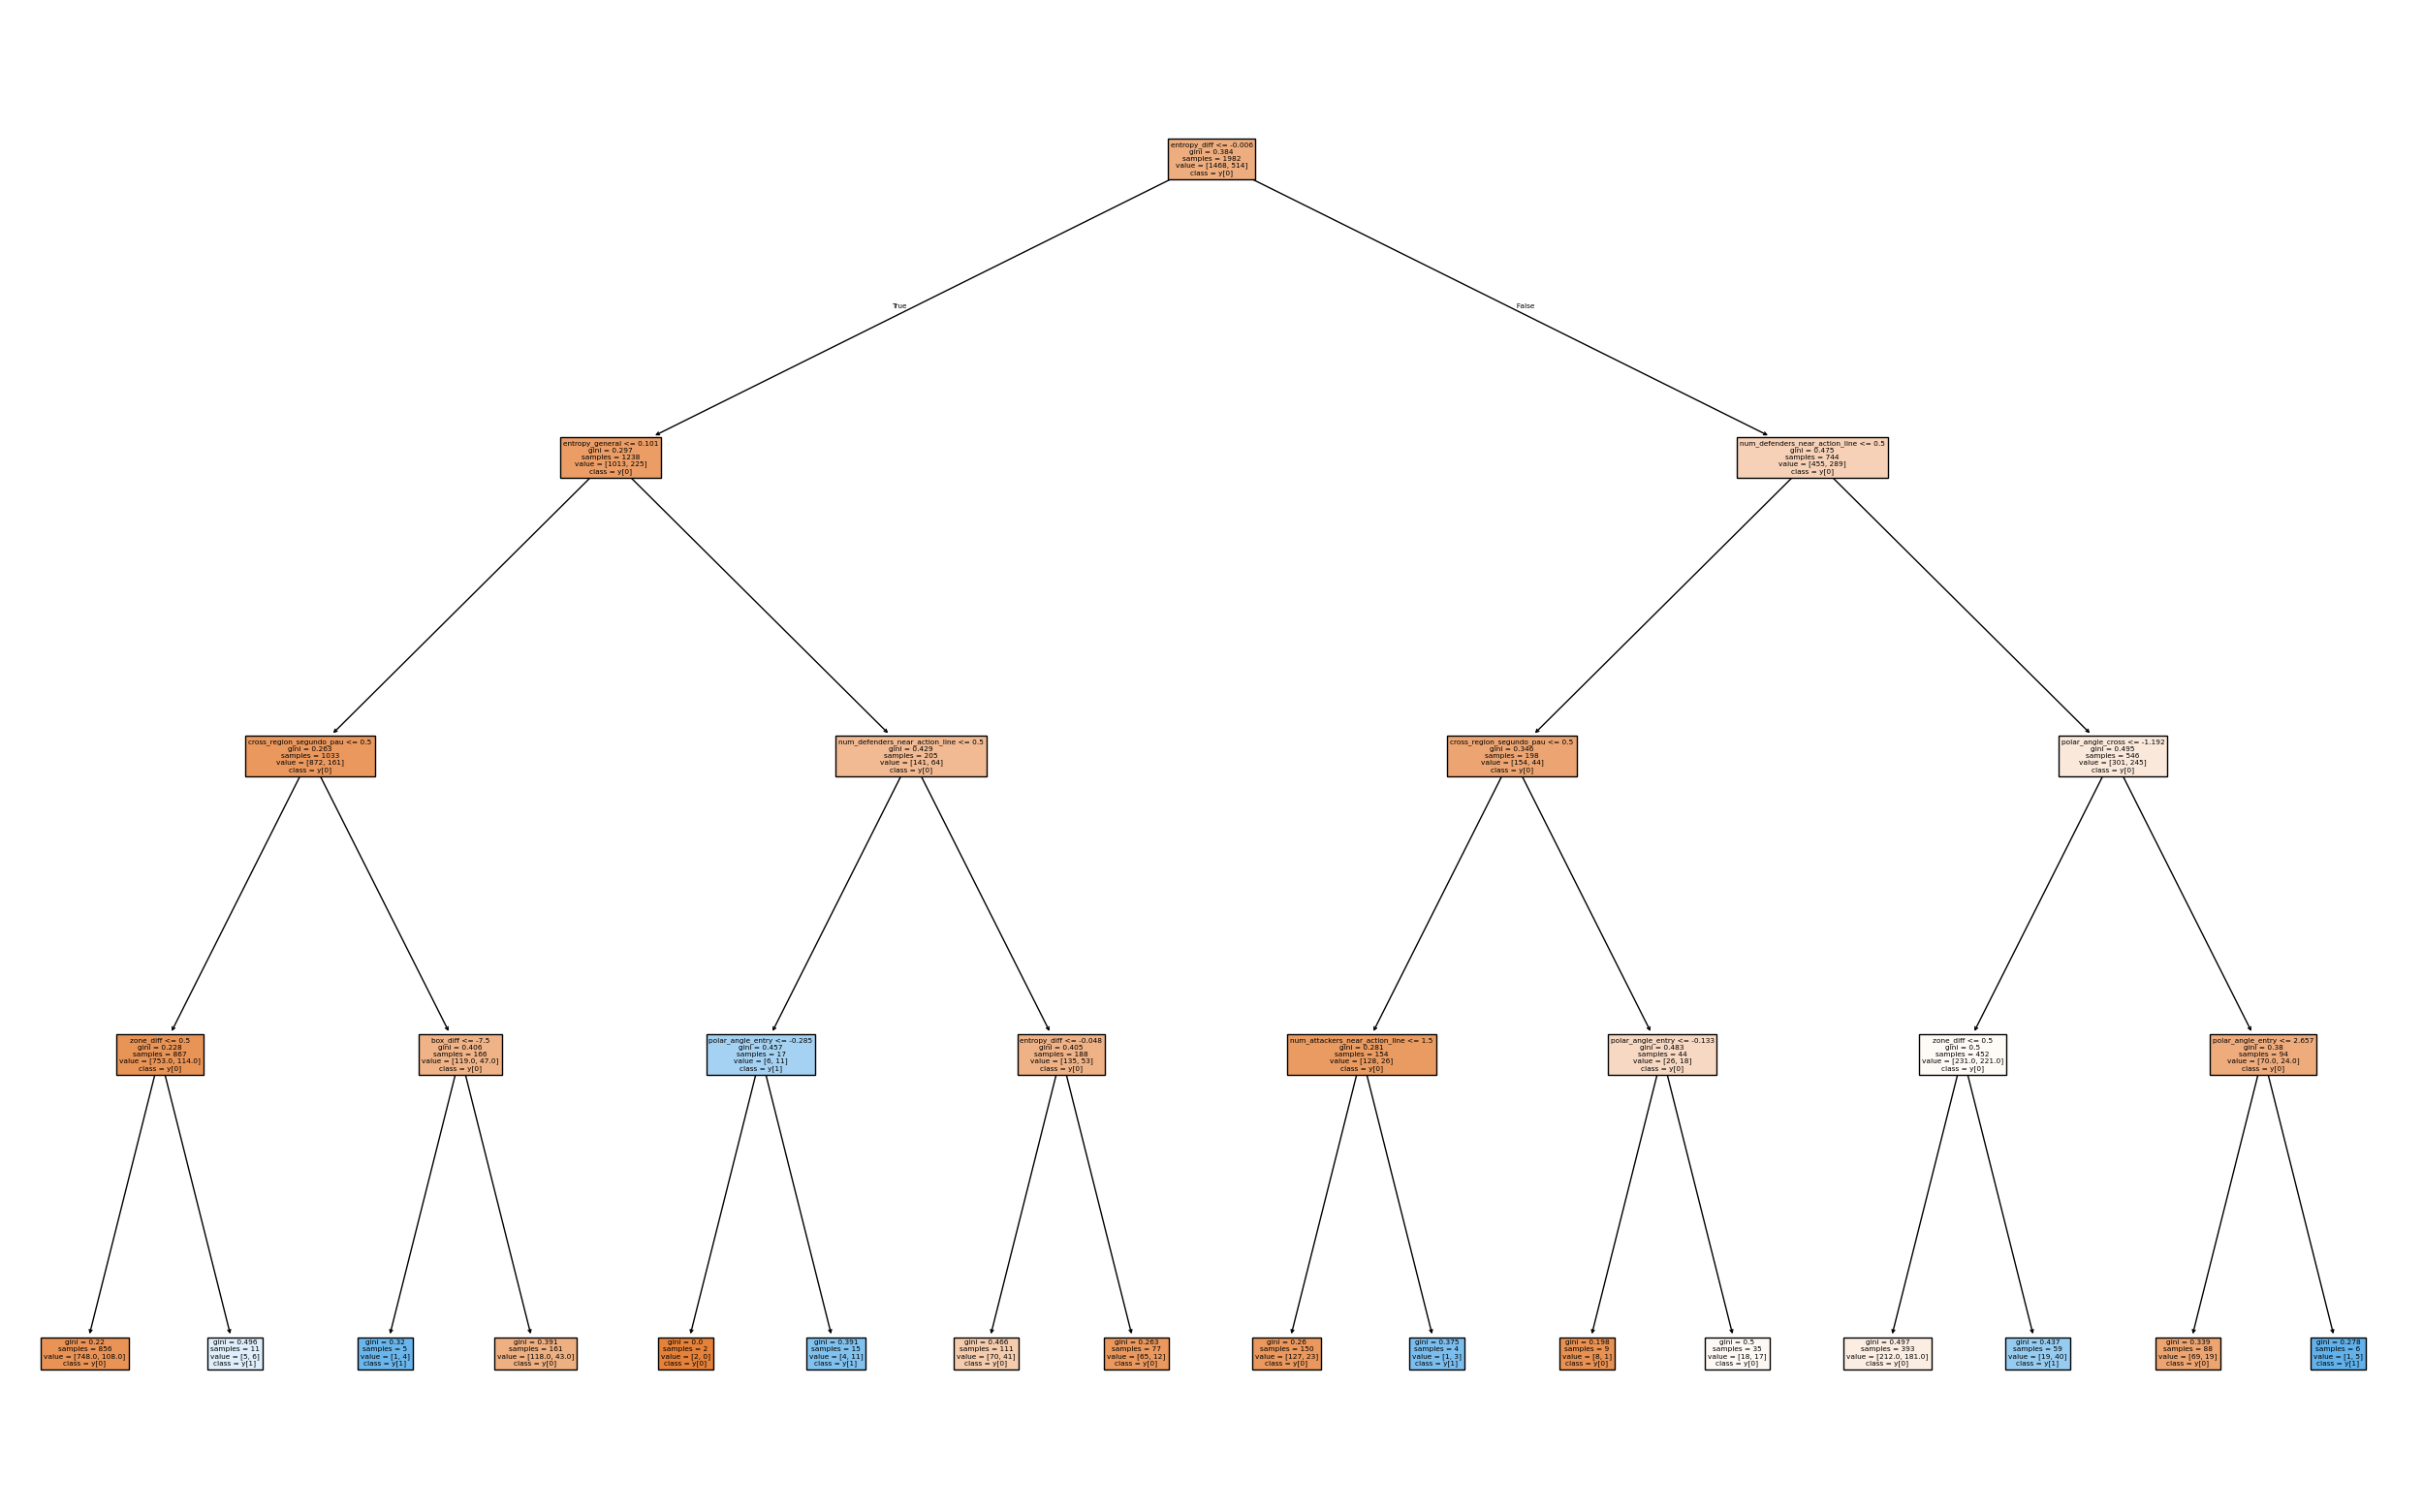

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

# Treinando um DecisionTree puro
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, Y_train)

# Plotando
plt.figure(figsize=(32,20))
plot_tree(tree_model, feature_names=X.columns, class_names=True, filled=True)
plt.show()
